In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import Normalizer
from sklearn import metrics
import math

In [2]:

US_data = pd.read_csv('all-states-history.csv')

### Data cleaning

In [3]:
## checking for null values in our dataset

US_data.isnull().sum()

date                                    0
state                                   0
death                                 850
deathConfirmed                      11358
deathIncrease                           0
deathProbable                       13187
hospitalized                         8398
hospitalizedCumulative               8398
hospitalizedCurrently                3441
hospitalizedIncrease                    0
inIcuCumulative                     16991
inIcuCurrently                       9144
negative                             7490
negativeIncrease                        0
negativeTestsAntibody               19322
negativeTestsPeopleAntibody         19808
negativeTestsViral                  15756
onVentilatorCumulative              19490
onVentilatorCurrently               11654
positive                              188
positiveCasesViral                   6534
positiveIncrease                        0
positiveScore                           0
positiveTestsAntibody             

In [4]:
## removing null values and replacing with 0

US_data.fillna(0 , inplace = True)

In [5]:
## confirming the changes

US_data.isnull().sum()

date                                0
state                               0
death                               0
deathConfirmed                      0
deathIncrease                       0
deathProbable                       0
hospitalized                        0
hospitalizedCumulative              0
hospitalizedCurrently               0
hospitalizedIncrease                0
inIcuCumulative                     0
inIcuCurrently                      0
negative                            0
negativeIncrease                    0
negativeTestsAntibody               0
negativeTestsPeopleAntibody         0
negativeTestsViral                  0
onVentilatorCumulative              0
onVentilatorCurrently               0
positive                            0
positiveCasesViral                  0
positiveIncrease                    0
positiveScore                       0
positiveTestsAntibody               0
positiveTestsAntigen                0
positiveTestsPeopleAntibody         0
positiveTest

In [6]:
## Having a look at the attibutes in the dataset

US_data.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [7]:
US_data.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,...,2.078000e+04,20780.000000,2.078000e+04,2.078000e+04,20780.000000,20780.000000,2.078000e+04,2.078000e+04,2.078000e+04,2.078000e+04
mean,3531.596824,1709.464004,24.790712,152.478008,5519.322666,5519.322666,993.427045,37.360780,352.678152,201.374013,...,2.169466e+06,17508.388210,3.765814e+04,5.085726e+04,17514.433253,8085.662079,4.271031e+05,2.739554e+03,1.609861e+06,1.296143e+04
std,6194.636505,3370.488127,60.162742,382.082440,10750.201894,10750.201894,1933.097380,208.237151,1119.533486,479.571454,...,4.423038e+06,33586.022461,1.187842e+05,2.064328e+05,77140.921218,47823.119169,1.056471e+06,1.621900e+04,3.862964e+06,3.749509e+04
min,0.000000,0.000000,-201.000000,0.000000,0.000000,0.000000,0.000000,-12257.000000,0.000000,0.000000,...,0.000000e+00,-130545.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.043744e+06,0.000000e+00,-1.154583e+06
25%,118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,...,9.682300e+04,1205.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,982.000000,0.000000,6.000000,0.000000,462.000000,462.000000,370.000000,0.000000,0.000000,19.000000,...,6.424245e+05,6125.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.889350e+05,1.896500e+03
75%,4159.000000,1921.000000,24.000000,114.000000,6411.000000,6411.000000,1051.000000,36.000000,0.000000,209.000000,...,2.243481e+06,19086.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,3.330730e+05,2.478000e+03,1.464490e+06,1.244100e+04
max,54124.000000,21177.000000,2559.000000,2594.000000,82237.000000,82237.000000,22851.000000,16373.000000,9263.000000,5225.000000,...,4.964601e+07,473076.000000,1.054711e+06,2.664340e+06,995580.000000,580372.000000,1.124825e+07,8.208170e+05,4.964601e+07,2.164543e+06


In [8]:
## verifying the changes

US_data.isnull().sum()
US_data

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,0.0,0,0.0,1293.0,1293.0,33.0,0,...,1731628.0,0,0.0,0.0,0.0,0.0,0.0,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,0.0,0.0,119757.0,0.0,2323788.0,2347,0.0,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,0.0,0.0,0.0,481311.0,0.0,0,2736442.0,3380
3,2021-03-07,AS,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,2140.0,0,0.0,0.0,0.0,0.0,0.0,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,0.0,444089.0,0.0,3842945.0,14856,7908105.0,45110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
20776,2020-01-16,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
20777,2020-01-15,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
20778,2020-01-14,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [9]:
## Converting Dates to Datetime Object 

US_data['date']=pd.to_datetime(US_data['date'])

In [10]:
##  checking that the above action worked or not

US_data.dtypes

date                                datetime64[ns]
state                                       object
death                                      float64
deathConfirmed                             float64
deathIncrease                                int64
deathProbable                              float64
hospitalized                               float64
hospitalizedCumulative                     float64
hospitalizedCurrently                      float64
hospitalizedIncrease                         int64
inIcuCumulative                            float64
inIcuCurrently                             float64
negative                                   float64
negativeIncrease                             int64
negativeTestsAntibody                      float64
negativeTestsPeopleAntibody                float64
negativeTestsViral                         float64
onVentilatorCumulative                     float64
onVentilatorCurrently                      float64
positive                       

In [11]:
## Making the data appropriate for time series analysis

time_series=US_data.groupby('date').sum()

In [12]:
## specifying the figure size

plt.rcParams['figure.figsize']=(7,8)

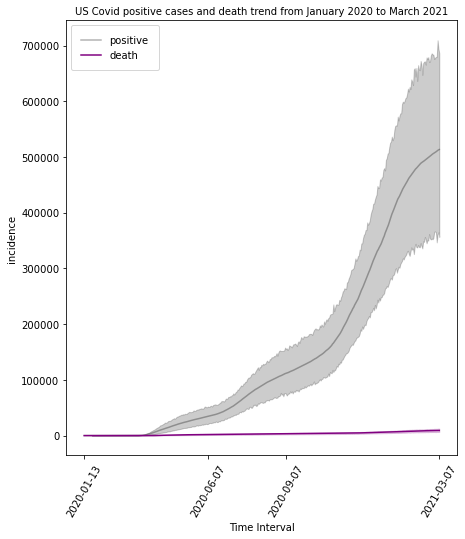

In [13]:
## Making a plot of the number of positive cases and death over the time period

sns.lineplot(x='date',y= 'positive' ,data=US_data,color='black',alpha=0.3)
sns.lineplot(x='date',y= 'death',data=US_data,color='purple')
plt.xlabel('Time Interval',fontsize=10)
plt.ylabel('incidence',fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-13','2020-06-07','2020-09-07','2021-03-07'],fontsize=10)
plt.yticks(fontsize=10)
plt.title('US Covid positive cases and death trend from January 2020 to March 2021',fontsize=10)
plt.legend(labels=['positive', 'death'],loc=2,borderpad=1,fontsize=10)

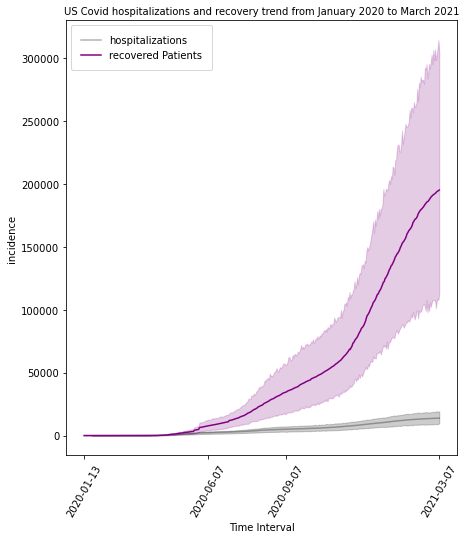

In [14]:
## Making a plot of the number of hospitalized and recovered patients over the time period

sns.lineplot(x='date',y= 'hospitalized' ,data=US_data,color='black',alpha=0.3)
sns.lineplot(x='date',y= 'recovered',data=US_data,color='purple')
plt.xlabel('Time Interval',fontsize=10)
plt.ylabel('incidence',fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-13','2020-06-07','2020-09-07','2021-03-07'],fontsize=10)
plt.yticks(fontsize=10)
plt.title('US Covid hospitalizations and recovery trend from January 2020 to March 2021',fontsize=10)
plt.legend(labels=['hospitalizations', 'recovered Patients'],loc=2,borderpad=1,fontsize=10)

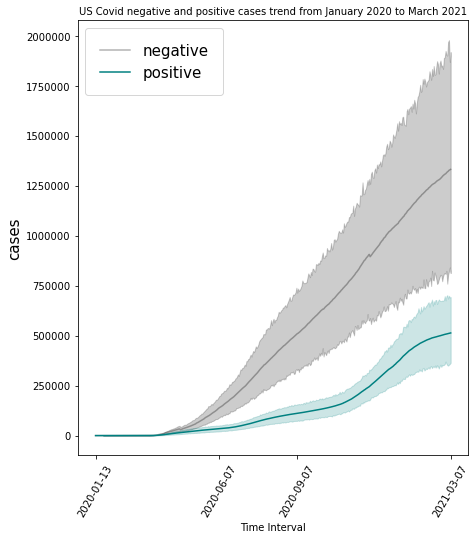

In [15]:
## Making a plot of the number negative and positive cases over the time period

sns.lineplot(x='date',y= 'negative' ,data=US_data,color='black',alpha=0.3)
sns.lineplot(x='date',y= 'positive',data=US_data,color='teal')
plt.xlabel('Time Interval',fontsize=10)
plt.ylabel('cases',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-13','2020-06-07','2020-09-07','2021-03-07'],fontsize=10)
plt.yticks(fontsize=10)
plt.title('US Covid negative and positive cases trend from January 2020 to March 2021',fontsize=10)
plt.legend(labels=['negative', 'positive'],loc=2,borderpad=1,fontsize=15)

In [16]:
## creating a datetime Index to access the datetime object

US_data['Year']=pd.DatetimeIndex(US_data['date']).year
US_data['Month']=pd.DatetimeIndex(US_data['date']).month
US_data['Day']=pd.DatetimeIndex(US_data['date']).day
US_data

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,Year,Month,Day
0,2021-03-07,AK,305.0,0.0,0,0.0,1293.0,1293.0,33.0,0,...,0.0,0.0,0.0,0.0,0,1731628.0,0,2021,3,7
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,0.0,119757.0,0.0,2323788.0,2347,0.0,0,2021,3,7
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,0.0,0.0,481311.0,0.0,0,2736442.0,3380,2021,3,7
3,2021-03-07,AS,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,2140.0,0,2021,3,7
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,0.0,444089.0,0.0,3842945.0,14856,7908105.0,45110,2021,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0,2020,1,17
20776,2020-01-16,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0,2020,1,16
20777,2020-01-15,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0,2020,1,15
20778,2020-01-14,WA,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0,2020,1,14


Text(0.5, 1.0, 'Monthly positive Case Rise in 2020')

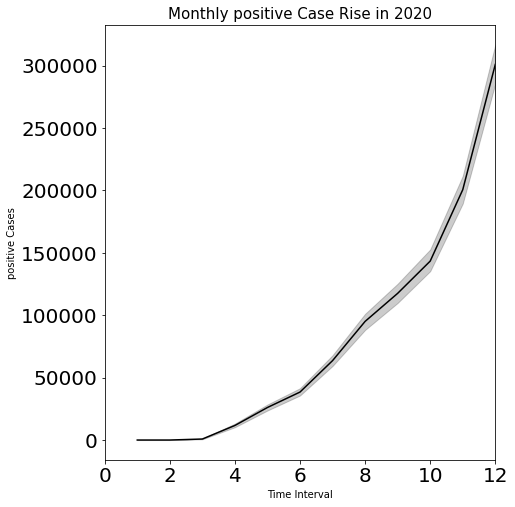

In [17]:
#Getting Data for the year 2020

US_data_2020 = US_data.where(US_data['date'].dt.year==2020)

#Plotting the timeseries graph
sns.lineplot(x='Month',y='positive',data= US_data_2020,color='black')
plt.xlabel('Time Interval',fontsize=10)
plt.ylabel('positive Cases',fontsize=10)
plt.xlim(0,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Monthly positive Case Rise in 2020',fontsize=15)

Text(0.5, 1.0, 'Monthly positive Case Rise in 2021')

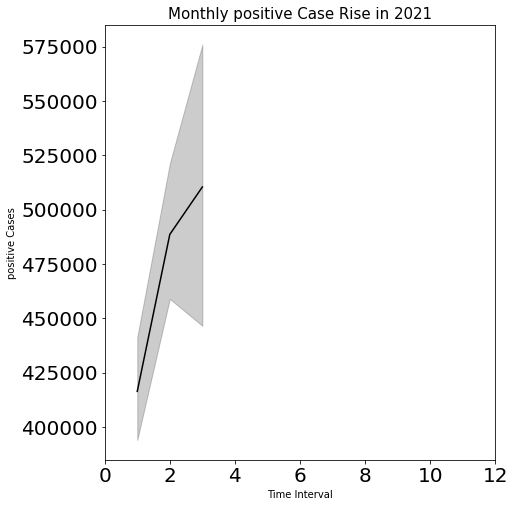

In [18]:
# For the year 2021 from jan to mar

US_data_2021 = US_data.where(US_data['date'].dt.year==2021)

#Plotting the timeseries graph
sns.lineplot(x='Month',y='positive',data= US_data_2021,color='black')
plt.xlabel('Time Interval',fontsize=10)
plt.ylabel('positive Cases',fontsize=10)
plt.xlim(0,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly positive Case Rise in 2021',fontsize=15)

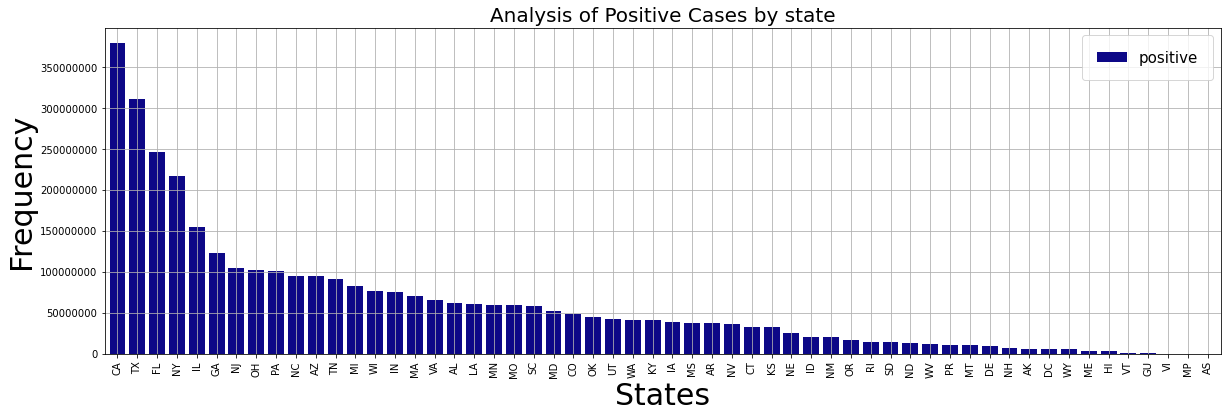

In [19]:
##  postitive Cases by state

POS = US_data.groupby('state').sum().sort_values('positive',ascending=False)
POS['positive'].plot(kind='bar',colormap='plasma',grid=True,figsize=(20,6),title='Analysis of positive Cases by state', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of Positive Cases by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

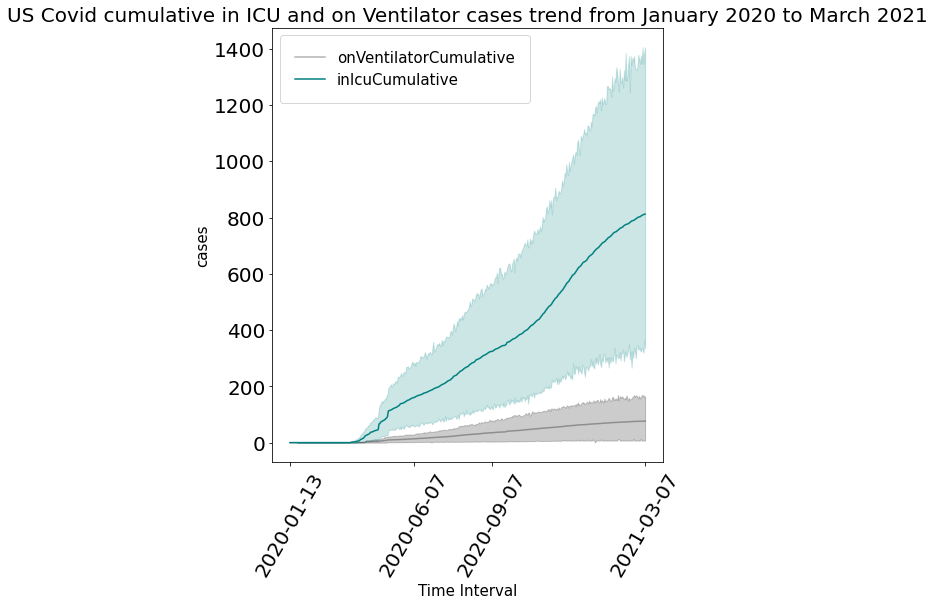

In [20]:
## Making a plot of the number cases in ICU and on Ventilator over the time period

sns.lineplot(x='date',y= 'onVentilatorCumulative' ,data=US_data,color='black',alpha=0.3)
sns.lineplot(x='date',y= 'inIcuCumulative',data=US_data,color='teal')
plt.xlabel('Time Interval',fontsize=15)
plt.ylabel('cases',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-13','2020-06-07','2020-09-07','2021-03-07'],fontsize=20)
plt.yticks(fontsize=20)
plt.title('US Covid cumulative in ICU and on Ventilator cases trend from January 2020 to March 2021',fontsize=20)
plt.legend(labels=['onVentilatorCumulative', 'inIcuCumulative'],loc=2,borderpad=1,fontsize=15)

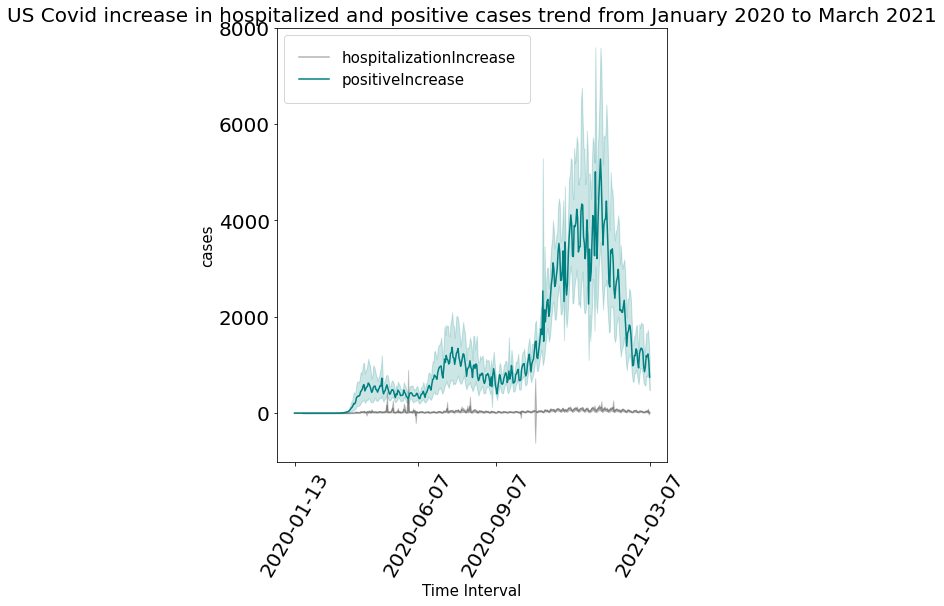

In [21]:
## Making a plot of the increase in number of hospitalized and positive cases over the time period

sns.lineplot(x='date',y= 'hospitalizedIncrease' ,data=US_data,color='black',alpha=0.3)
sns.lineplot(x='date',y= 'positiveIncrease',data=US_data,color='teal')
plt.xlabel('Time Interval',fontsize=15)
plt.ylabel('cases',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-13','2020-06-07','2020-09-07','2021-03-07'],fontsize=20)
plt.yticks(fontsize=20)
plt.title('US Covid increase in hospitalized and positive cases trend from January 2020 to March 2021',fontsize=20)
plt.legend(labels=['hospitalizationIncrease', 'positiveIncrease'],loc=2,borderpad=1,fontsize=15)

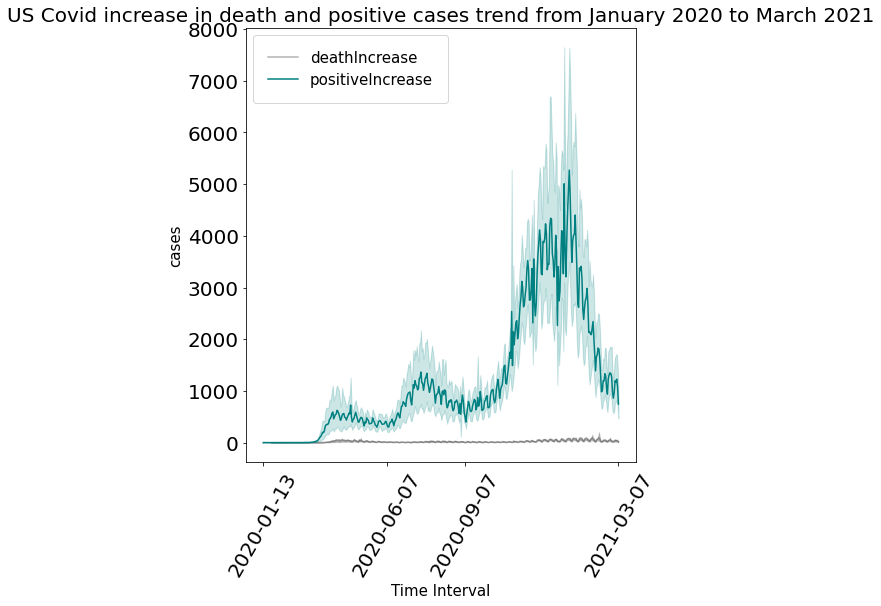

In [22]:
## Making a plot of the icrease in number of death and positive cases over the time period

sns.lineplot(x='date',y= 'deathIncrease' ,data=US_data,color='black',alpha=0.3)
sns.lineplot(x='date',y= 'positiveIncrease',data=US_data,color='teal')
plt.xlabel('Time Interval',fontsize=15)
plt.ylabel('cases',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-13','2020-06-07','2020-09-07','2021-03-07'],fontsize=20)
plt.yticks(fontsize=20)
plt.title('US Covid increase in death and positive cases trend from January 2020 to March 2021',fontsize=20)
plt.legend(labels=['deathIncrease', 'positiveIncrease'],loc=2,borderpad=1,fontsize=15)

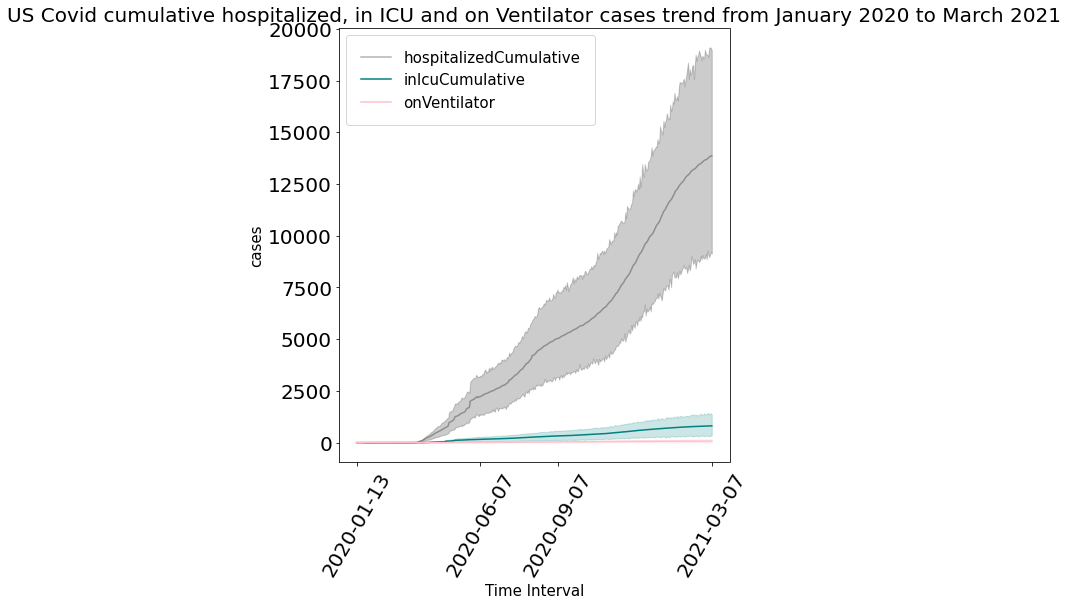

In [23]:
## Making a plot of the cumulative number of hospitalized, in ICU and on ventilator cases over the time period

sns.lineplot(x='date',y= 'hospitalizedCumulative' ,data=US_data,color='black',alpha=0.3)
sns.lineplot(x='date',y= 'inIcuCumulative',data=US_data,color='teal')
sns.lineplot(x='date',y= 'onVentilatorCumulative',data=US_data,color='pink')
plt.xlabel('Time Interval',fontsize=15)
plt.ylabel('cases',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-13','2020-06-07','2020-09-07','2021-03-07'],fontsize=20)
plt.yticks(fontsize=20)
plt.title('US Covid cumulative hospitalized, in ICU and on Ventilator cases trend from January 2020 to March 2021',fontsize=20)
plt.legend(labels=['hospitalizedCumulative', 'inIcuCumulative', 'onVentilator'],loc=2,borderpad=1,fontsize=15)

<ipython-input-24-c88cb72a1400>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_increase[neg_increase < 0] = 0


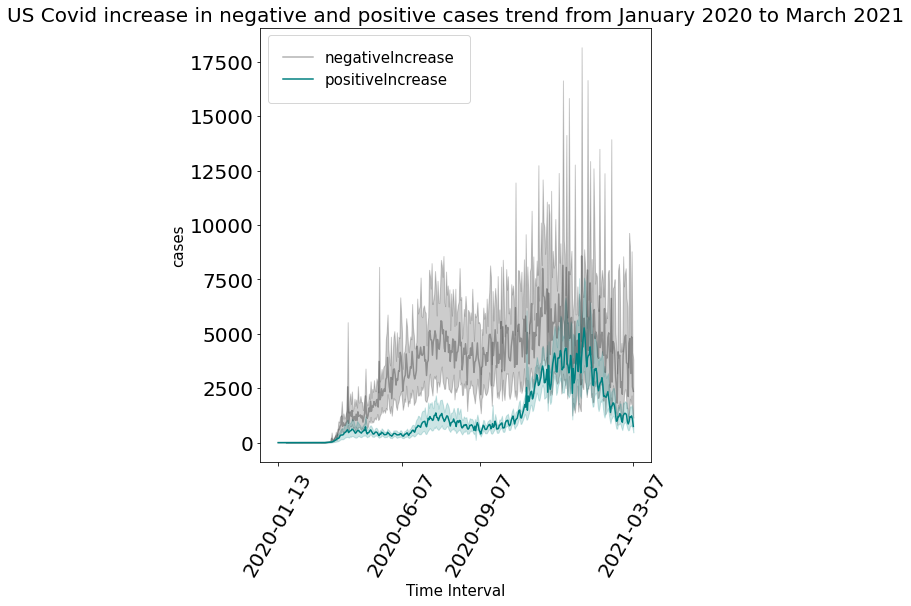

In [24]:
neg_increase = US_data['negativeIncrease']
neg_increase.head()
neg_increase[neg_increase < 0] = 0
sns.lineplot(x='date',y='negativeIncrease',data=US_data,color='black',alpha=0.3)
sns.lineplot(x='date',y='positiveIncrease',data=US_data,color='teal')
plt.xlabel('Time Interval',fontsize=15)
plt.ylabel('cases',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-13','2020-06-07','2020-09-07','2021-03-07'],fontsize=20)
plt.yticks(fontsize=20)
plt.title('US Covid increase in negative and positive cases trend from January 2020 to March 2021',fontsize=20)
plt.legend(labels=['negativeIncrease', 'positiveIncrease'],loc=2,borderpad=1,fontsize=15)

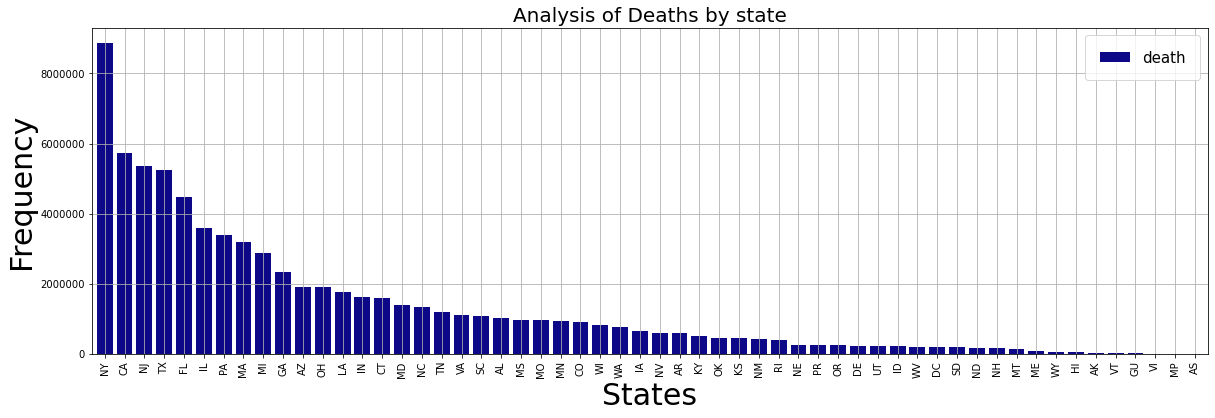

In [25]:
Death = US_data.groupby('state').sum().sort_values('death',ascending=False)
Death['death'].plot(kind='bar',colormap='plasma',grid=True,figsize=(20,6),title='Analysis  Deaths by state', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of Deaths by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

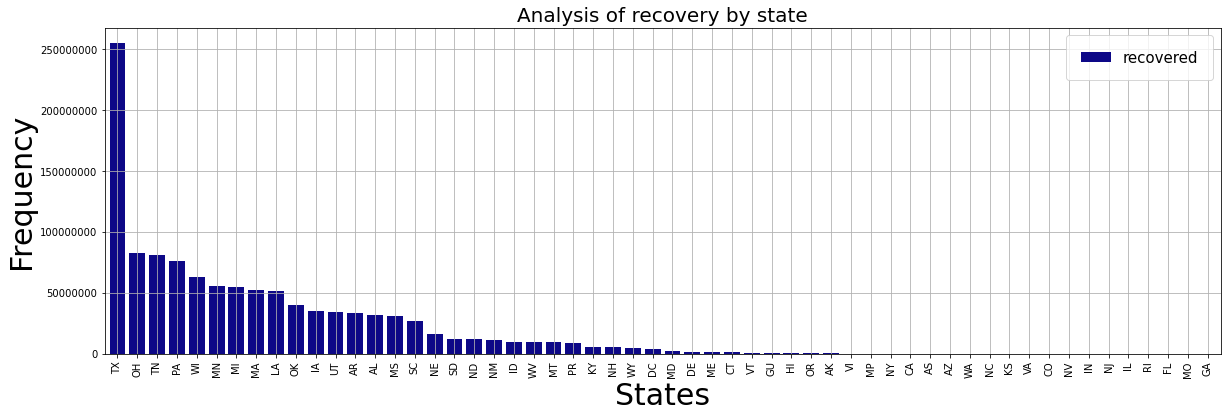

In [26]:
Recovery = US_data.groupby('state').sum().sort_values('recovered',ascending=False)
Recovery['recovered'].plot(kind='bar',colormap='plasma',grid=True,figsize=(20,6),title='Analysis recovery by state', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of recovery by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

In [27]:
# This function calculates the 7 Day average positive cases for a particular day 

def calculate_7_day(df,column):
    n=len(df)-1
    t=0
    avg=[]
    while True:
        if t==n+1:
            break
        if t+6<n:
            average=np.round(df.iloc[t:t+6].mean()[column])
            avg.append(average)
        else:
            end=n-t
            average=np.round(df.iloc[end:n].mean()[column])
            avg.append(average)
        t+=1
    return avg


## we calculate 7 day average for top 5 states with positive cases and recovery

In [28]:
## We begin with Texas
Texas = US_data.where(US_data['state']=='TX')
Texas.dropna(inplace=True)
Texas.set_index('date',inplace=True)
Texas['7DayAvg']=calculate_7_day(Texas,'positive')

In [29]:
#Verifing our Changes
Texas

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,Year,Month,Day,7DayAvg
date,,,,,,,,,,,,,,,,,,,,,
2021-03-07,TX,44451.0,0.0,84.0,0.0,0.0,0.0,4721.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19907384.0,76040.0,2021.0,3.0,7.0,2673238.0
2021-03-06,TX,44367.0,0.0,233.0,0.0,0.0,0.0,4921.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19831344.0,11292.0,2021.0,3.0,6.0,2666742.0
2021-03-05,TX,44134.0,0.0,256.0,0.0,0.0,0.0,5065.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19820052.0,55875.0,2021.0,3.0,5.0,2660102.0
2021-03-04,TX,43878.0,0.0,315.0,0.0,0.0,0.0,5263.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19764177.0,56522.0,2021.0,3.0,4.0,2653754.0
2021-03-03,TX,43563.0,0.0,297.0,0.0,0.0,0.0,5508.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19707655.0,64597.0,2021.0,3.0,3.0,2646703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-07,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2260.0,24.0,2020.0,3.0,7.0,823348.0
2020-03-06,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2236.0,1286.0,2020.0,3.0,6.0,828397.0
2020-03-05,TX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,950.0,930.0,2020.0,3.0,5.0,833438.0


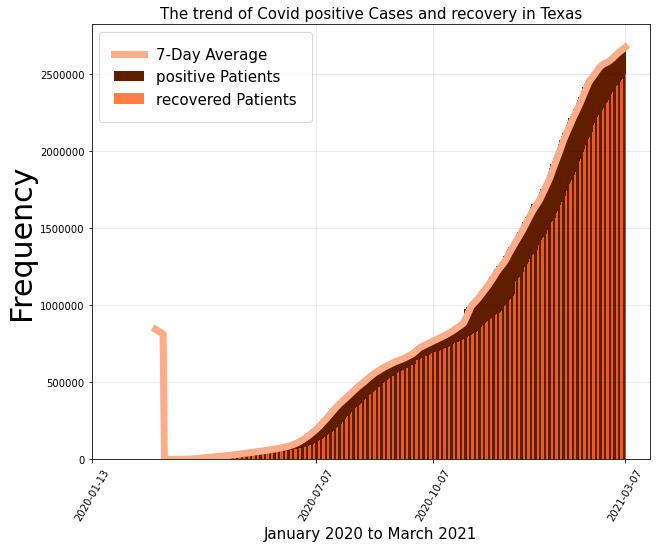

In [30]:
#plotting for Texas
fig,ax=plt.subplots(figsize=(10,8))


ax.bar(Texas.index, Texas['positive'],width=1.5,color='#611d00',alpha=1,label='positive Patients')
ax.bar(Texas.index, Texas['recovered'],width=0.5,color='#ff6826',alpha=0.85,label='recovered Patients')
ax.plot(Texas.index[0:370],Texas['7DayAvg'].iloc[0:370],color='#ffac88',linewidth=7,label='7-Day Average')
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('January 2020 to March 2021', fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.title('The trend of Covid positive Cases and recovery in Texas',fontsize=15)
plt.xticks(ticks=['2020-01-13','2020-07-07','2020-10-07','2021-03-07'],rotation=60,fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=2,borderpad=1,fontsize=15) 
          

In [31]:
## Doing same for Califonia
Califonia = US_data.where(US_data['state']=='CA')
Califonia.dropna(inplace=True)
Califonia.set_index('date',inplace=True)
Califonia['7DayAvg']=calculate_7_day(Califonia,'positive')

In [32]:
#Verifing our Changes
Califonia

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,Year,Month,Day,7DayAvg
date,,,,,,,,,,,,,,,,,,,,,
2021-03-07,CA,54124.0,0.0,258.0,0.0,0.0,0.0,4291.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49646014.0,133186.0,2021.0,3.0,7.0,3491190.0
2021-03-06,CA,53866.0,0.0,418.0,0.0,0.0,0.0,4513.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49512828.0,218325.0,2021.0,3.0,6.0,3487470.0
2021-03-05,CA,53448.0,0.0,400.0,0.0,0.0,0.0,4714.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49294503.0,146818.0,2021.0,3.0,5.0,3483801.0
2021-03-04,CA,53048.0,0.0,273.0,0.0,0.0,0.0,4967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49147685.0,119637.0,2021.0,3.0,4.0,3480093.0
2021-03-03,CA,52775.0,0.0,278.0,0.0,0.0,0.0,5110.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49028048.0,130858.0,2021.0,3.0,3.0,3476303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,550.0,19.0,2020.0,3.0,8.0,1003076.0
2020-03-07,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,531.0,9.0,2020.0,3.0,7.0,1009886.0
2020-03-06,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,522.0,7.0,2020.0,3.0,6.0,1016671.0


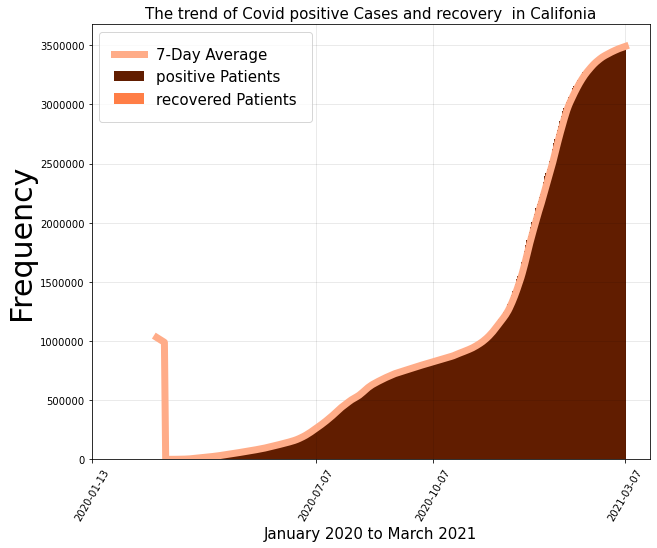

In [33]:
#plotting for Califonia
fig,ax=plt.subplots(figsize=(10,8))

ax.bar(Califonia.index, Califonia['positive'],width=1.5,color='#611d00',alpha=1,label='positive Patients')
ax.bar(Califonia.index, Califonia['recovered'],width=0.5,color='#ff6826',alpha=0.85,label='recovered Patients')
ax.plot(Califonia.index[0:369], Califonia['7DayAvg'].iloc[0:369],color='#ffac88',linewidth=7,label='7-Day Average')
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('January 2020 to March 2021', fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.title('The trend of Covid positive Cases and recovery  in Califonia',fontsize=15)
plt.xticks(ticks=['2020-01-13','2020-07-07','2020-10-07','2021-03-07'],rotation=60,fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=2,borderpad=1,fontsize=15) 
          

In [34]:
## for new york
new_york = US_data.where(US_data['state']=='NY')
new_york.dropna(inplace=True)
new_york.set_index('date',inplace=True)
new_york['7DayAvg']=calculate_7_day(new_york,'positive')


In [35]:
#Verifing our Changes
new_york

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,Year,Month,Day,7DayAvg
date,,,,,,,,,,,,,,,,,,,,,
2021-03-07,NY,39029.0,0.0,59.0,0.0,0.0,0.0,4789.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,3.0,7.0,1662120.0
2021-03-06,NY,38970.0,0.0,79.0,0.0,0.0,0.0,4954.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,3.0,6.0,1654706.0
2021-03-05,NY,38891.0,0.0,95.0,0.0,0.0,0.0,5034.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,3.0,5.0,1647383.0
2021-03-04,NY,38796.0,0.0,61.0,0.0,0.0,0.0,5177.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,3.0,4.0,1640072.0
2021-03-03,NY,38735.0,0.0,75.0,0.0,0.0,0.0,5323.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,3.0,3.0,1632896.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,3.0,6.0,574327.0
2020-03-05,NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,3.0,5.0,577279.0
2020-03-04,NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,3.0,4.0,580239.0


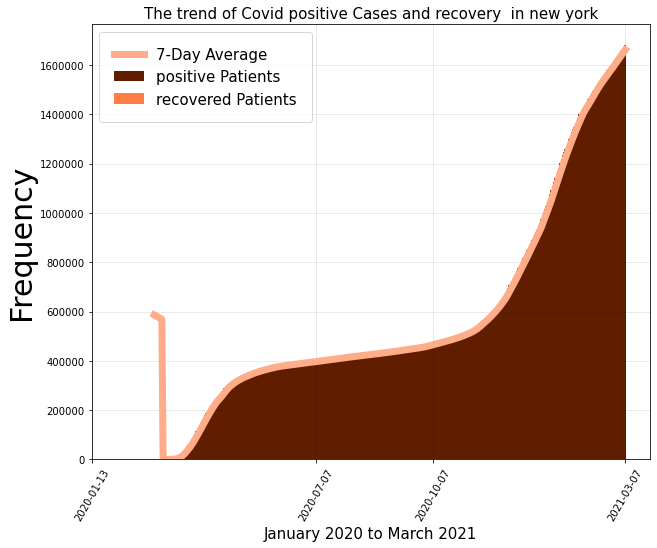

In [36]:
## plotting for new york
fig,ax=plt.subplots(figsize=(10,8))

ax.bar(new_york.index, new_york['positive'],width=1.5,color='#611d00',alpha=1,label='positive Patients')
ax.bar(new_york.index, new_york['recovered'],width=0.5,color='#ff6826',alpha=0.85,label='recovered Patients')
ax.plot(new_york.index[0:371], new_york['7DayAvg'].iloc[0:371],color='#ffac88',linewidth=7,label='7-Day Average')
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('January 2020 to March 2021', fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.title('The trend of Covid positive Cases and recovery  in new york',fontsize=15)
plt.xticks(ticks=['2020-01-13','2020-07-07','2020-10-07','2021-03-07'], rotation=60,fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=2,borderpad=1,fontsize=15) 
          

In [37]:
## for florida
florida = US_data.where(US_data['state']=='FL')
florida.dropna(inplace=True)
florida.set_index('date',inplace=True)
florida['7DayAvg']=calculate_7_day(florida,'positive')


In [38]:
#Verifing our Changes
florida

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,Year,Month,Day,7DayAvg
date,,,,,,,,,,,,,,,,,,,,,
2021-03-07,FL,32266.0,0.0,66.0,0.0,82237.0,82237.0,3307.0,92.0,0.0,...,995580.0,0.0,11248247.0,23190.0,19482607.0,52132.0,2021.0,3.0,7.0,1896884.0
2021-03-06,FL,32200.0,0.0,107.0,0.0,82145.0,82145.0,3352.0,243.0,0.0,...,995580.0,0.0,11225057.0,27869.0,19430475.0,59303.0,2021.0,3.0,6.0,1891319.0
2021-03-05,FL,32093.0,0.0,138.0,0.0,81902.0,81902.0,3419.0,302.0,0.0,...,995580.0,0.0,11197188.0,32786.0,19371172.0,77877.0,2021.0,3.0,5.0,1886147.0
2021-03-04,FL,31955.0,0.0,126.0,0.0,81600.0,81600.0,3566.0,322.0,0.0,...,970437.0,0.0,11164402.0,32447.0,19293295.0,74448.0,2021.0,3.0,4.0,1880842.0
2021-03-03,FL,31829.0,0.0,133.0,0.0,81278.0,81278.0,3596.0,306.0,0.0,...,970437.0,0.0,11131955.0,23109.0,19218847.0,51529.0,2021.0,3.0,3.0,1875631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02,FL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,2.0,2.0,598816.0
2020-02-01,FL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,2.0,1.0,602056.0
2020-01-31,FL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,1.0,31.0,605294.0


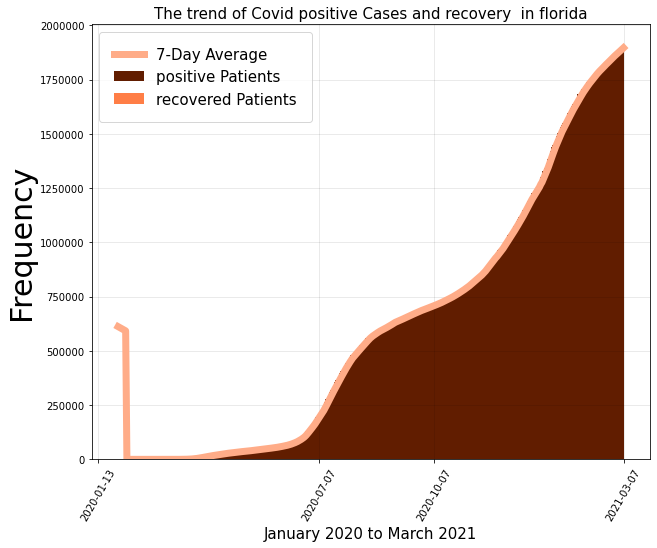

In [39]:
#plotting for florida
fig,ax=plt.subplots(figsize=(10,8))

ax.bar(florida.index, florida['positive'],width=1.5,color='#611d00',alpha=1,label='positive Patients')
ax.bar(florida.index, florida['recovered'],width=0.5,color='#ff6826',alpha=0.85,label='recovered Patients')
ax.plot(florida.index[0:404], florida['7DayAvg'].iloc[0:404],color='#ffac88',linewidth=7,label='7-Day Average')
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('January 2020 to March 2021', fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.title('The trend of Covid positive Cases and recovery  in florida',fontsize=15)
plt.xticks(ticks=['2020-01-13','2020-07-07','2020-10-07','2021-03-07'],rotation=60,fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=2,borderpad=1,fontsize=15) 
          

In [40]:
## for illinois
illinois = US_data.where(US_data['state']=='IL')
illinois.dropna(inplace=True)
illinois.set_index('date',inplace=True)
illinois['7DayAvg']=calculate_7_day(illinois,'positive')


In [41]:
## verify changes
illinois

,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,Year,Month,Day,7DayAvg
date,,,,,,,,,,,,,,,,,,,,,
2021-03-07,IL,23014.0,20763.0,12.0,2251.0,0.0,0.0,1141.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18640190.0,68094.0,2021.0,3.0,7.0,1194083.0
2021-03-06,IL,23002.0,20750.0,56.0,2252.0,0.0,0.0,1210.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18572096.0,79248.0,2021.0,3.0,6.0,1192334.0
2021-03-05,IL,22946.0,20700.0,44.0,2246.0,0.0,0.0,1166.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18492848.0,103336.0,2021.0,3.0,5.0,1190572.0
2021-03-04,IL,22902.0,20668.0,49.0,2234.0,0.0,0.0,1200.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18389512.0,73990.0,2021.0,3.0,4.0,1189030.0
2021-03-03,IL,22853.0,20626.0,50.0,2227.0,0.0,0.0,1260.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18315522.0,80854.0,2021.0,3.0,3.0,1187431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,IL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,3.0,8.0,414121.0
2020-03-07,IL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,3.0,7.0,416256.0
2020-03-06,IL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,3.0,6.0,418383.0


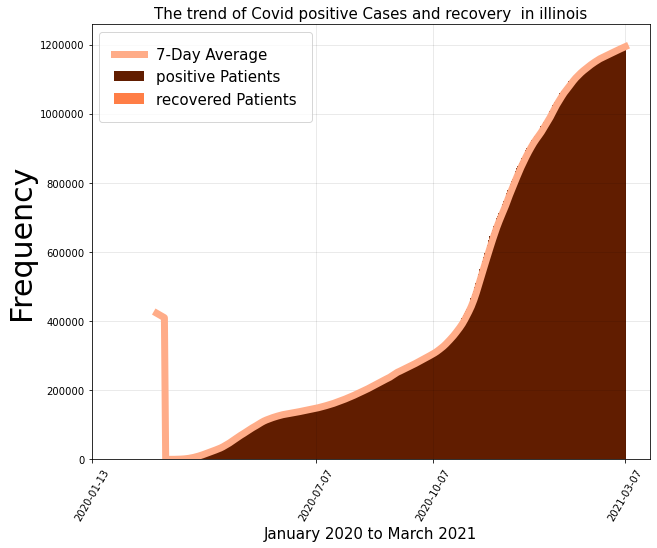

In [42]:
## Plotting for illinois
fig,ax=plt.subplots(figsize=(10,8))

ax.bar(illinois.index, illinois['positive'],width=1.5,color='#611d00',alpha=1,label='positive Patients')
ax.bar(illinois.index, illinois['recovered'],width=0.5,color='#ff6826',alpha=0.85,label='recovered Patients')
ax.plot(illinois.index[0:369], illinois['7DayAvg'].iloc[0:369],color='#ffac88',linewidth=7,label='7-Day Average')
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('January 2020 to March 2021', fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.title('The trend of Covid positive Cases and recovery  in illinois',fontsize=15)
plt.xticks(ticks=['2020-01-13','2020-07-07','2020-10-07','2021-03-07'],rotation=60,fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=2,borderpad=1,fontsize=15) 
          

In [43]:
#Anaysis of ALL US States
All_US_states = US_data.dropna()
All_US_states.set_index('date',inplace=True)
All_US_states['7DayAvg']=calculate_7_day(All_US_states,'positive')

In [44]:
#we transform our dataset for time series analysis
All_US_states_dates =All_US_states.groupby('date').sum()


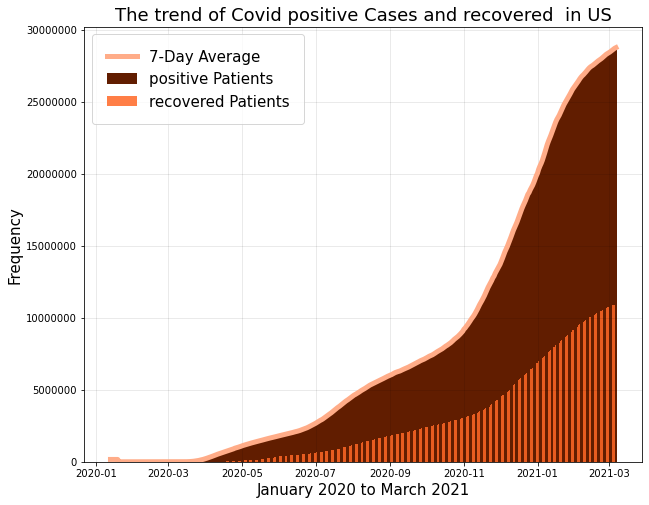

In [45]:
fig,ax=plt.subplots(figsize=(10,8))

ax.bar(All_US_states_dates.index, All_US_states_dates['positive'],width=1.5,color='#611d00',alpha=1,label='positive Patients')
ax.bar(All_US_states_dates.index, All_US_states_dates['recovered'],width=0.5,color='#ff6826',alpha=0.85,label='recovered Patients')
ax.plot(All_US_states_dates.index[0:550], All_US_states_dates['7DayAvg'].iloc[0:550],color='#ffac88',linewidth=5,label='7-Day Average')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('January 2020 to March 2021', fontsize=15)
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ylabel('Frequency', fontsize=15)
plt.title('The trend of Covid positive Cases and recovered  in US',fontsize=18)

plt.yticks(fontsize=10)

plt.legend(loc=2,borderpad=1,fontsize=15)


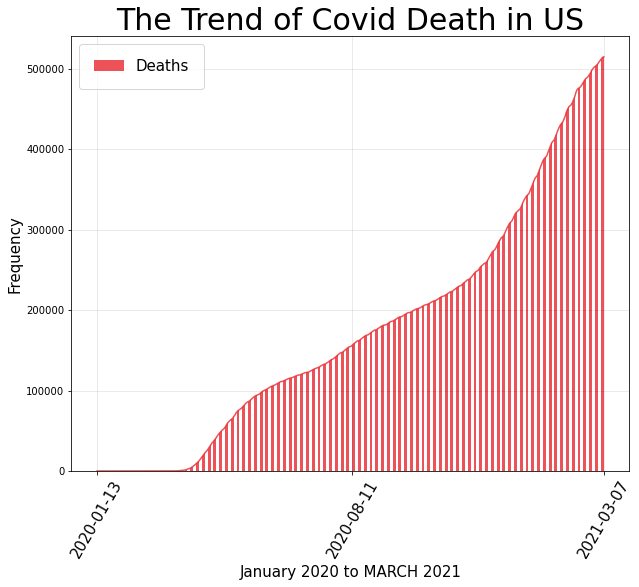

In [46]:
# Trend for Deaths in Covid in US

fig,ax=plt.subplots(figsize=(10,8))

ax.bar(All_US_states_dates.index, All_US_states_dates['death'],width=0.5,color='#e9343a',alpha=0.85,label='Deaths')
ax.plot(All_US_states_dates.index, All_US_states_dates['death'],color='#e9343a',alpha=0.85,)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('January 2020 to MARCH 2021', fontsize=15)
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ylabel('Frequency', fontsize=15)
plt.title('The Trend of Covid Death in US',fontsize=30)
plt.xticks(ticks=['2020-01-13','2020-08-11','2021-03-07'],rotation=60,fontsize=15)
plt.yticks(fontsize=10)
plt.legend(loc=2,borderpad=1,fontsize=15)


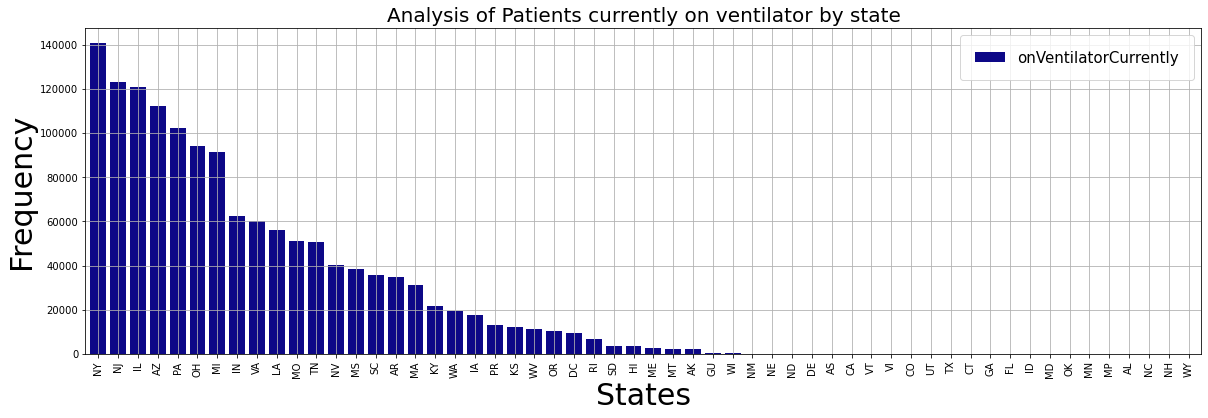

In [47]:
Ventilator = US_data.groupby('state').sum().sort_values('onVentilatorCurrently',ascending=False)
Ventilator['onVentilatorCurrently'].plot(kind='bar',colormap='plasma',grid=True,figsize=(20,6),title='Analysis of Patients on ventilator', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of Patients currently on ventilator by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

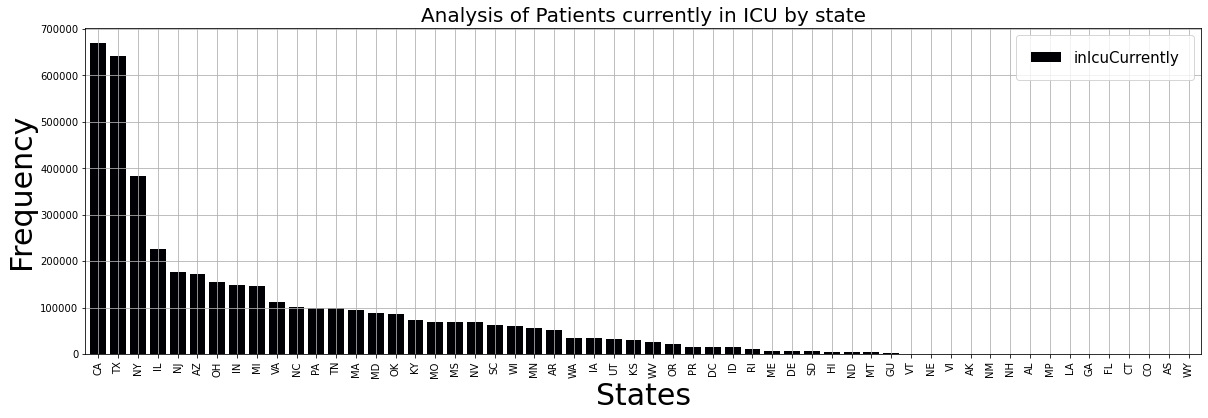

In [48]:
ICU = US_data.groupby('state').sum().sort_values('inIcuCurrently',ascending=False)
ICU['inIcuCurrently'].plot(kind='bar',colormap='magma',grid=True,figsize=(20,6),title='Analysis of Patients In ICU', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of Patients currently in ICU by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

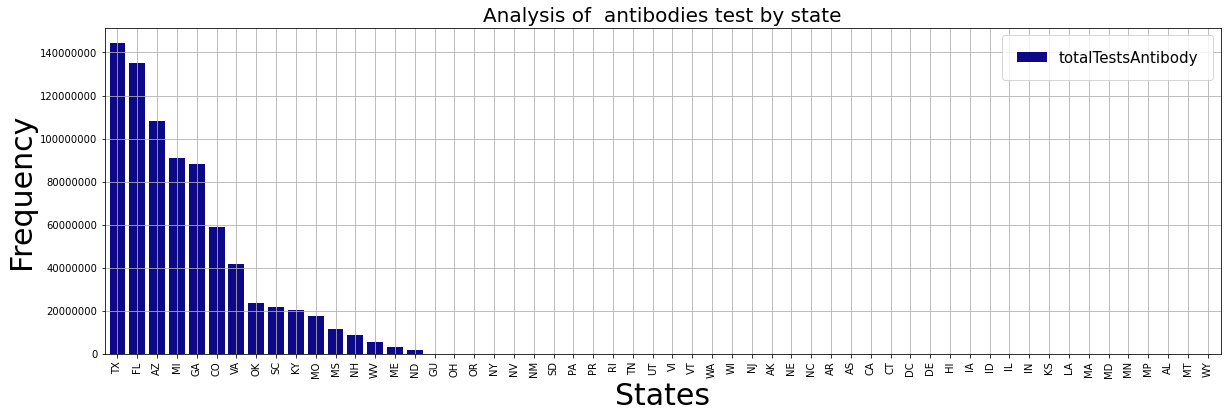

In [49]:

Antibody = US_data.groupby('state').sum().sort_values('totalTestsAntibody',ascending=False)
Antibody['totalTestsAntibody'].plot(kind='bar',colormap='plasma',grid=True,figsize=(20,6),title='Analysis of  covid antibody testing by state', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of  antibodies test by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

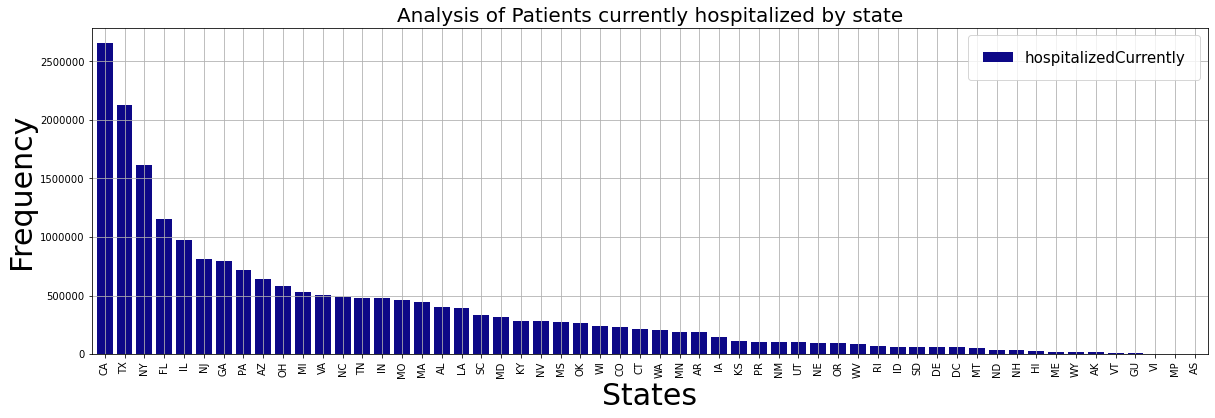

In [50]:

Hospitalized = US_data.groupby('state').sum().sort_values('hospitalizedCurrently',ascending=False)
Hospitalized['hospitalizedCurrently'].plot(kind='bar',colormap='plasma',grid=True,figsize=(20,6),title='Analysis of Patients currently hospitalized', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of Patients currently hospitalized by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

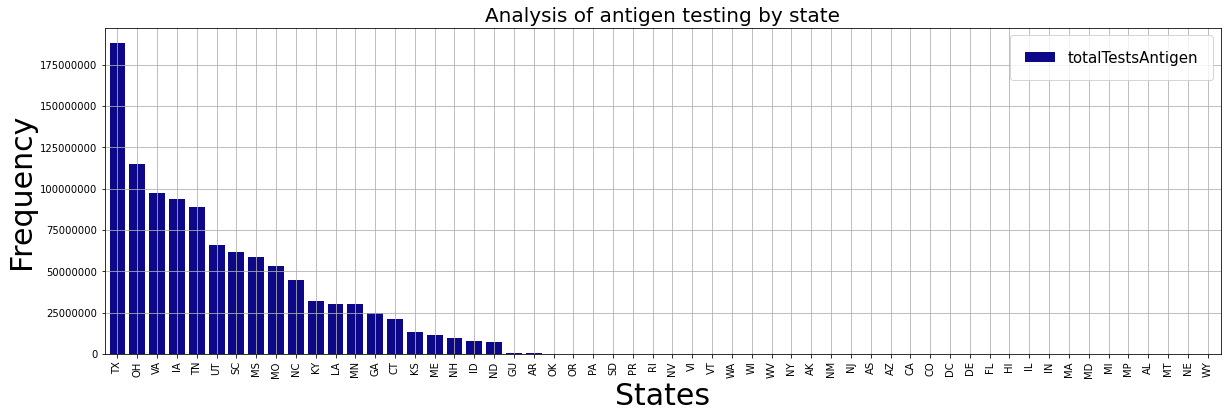

In [51]:
   

Antigen = US_data.groupby('state').sum().sort_values('totalTestsAntigen',ascending=False)
Antigen['totalTestsAntigen'].plot(kind='bar',colormap='plasma',grid=True,figsize=(20,6),title='Analysis of  antigen testing by state', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of antigen testing by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

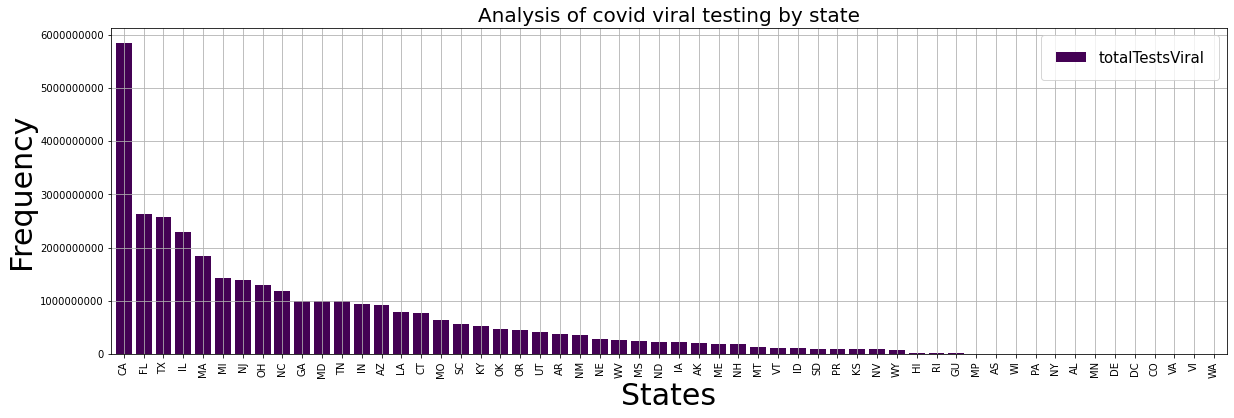

In [52]:
 

Viraltest = US_data.groupby('state').sum().sort_values('totalTestsViral',ascending=False)
Viraltest['totalTestsViral'].plot(kind='bar',colormap='viridis',grid=True,figsize=(20,6),title='Analysis of covid viral testing by state', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of covid viral testing by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

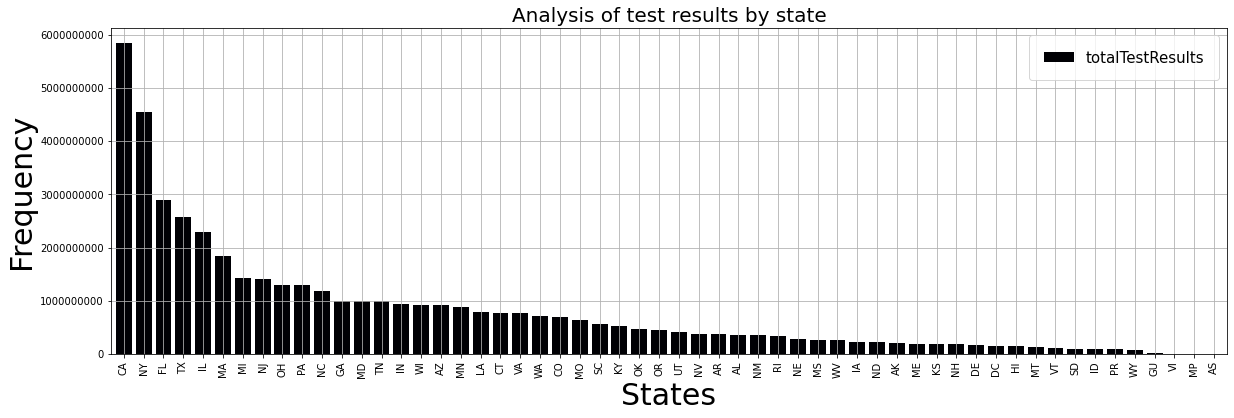

In [53]:


Total_results = US_data.groupby('state').sum().sort_values('totalTestResults',ascending=False)
Total_results['totalTestResults'].plot(kind='bar',colormap='inferno',grid=True,figsize=(20,6),title='Analysis of test results by state', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States', fontsize=30)
plt.title('Analysis of test results by state',fontsize=20)
plt.legend(loc=0,borderpad=1,fontsize=15)

## calculation of percentage mortality and recovery  from the number of positive cases

In [54]:
by_state = pd.pivot_table(US_data, values = ['recovered', 'death' , 'positive'], index = 'state' ,aggfunc = max)

In [55]:
by_state['recovery_rate'] = by_state['recovered']*100/by_state['positive']

In [56]:
by_state['mortality_rate'] = by_state['death']*100/by_state['positive']

In [57]:
by_state = by_state.sort_values(by = 'positive', ascending = False)

In [58]:
by_state.style.background_gradient(cmap = 'cubehelix')

,death,positive,recovered,recovery_rate,mortality_rate
state,,,,,
CA,54124.000000,3501394.000000,0.000000,0.000000,1.545784
TX,44451.000000,2686818.000000,2502609.000000,93.143972,1.654411
FL,32266.000000,1909209.000000,0.000000,0.000000,1.690019
NY,39029.000000,1681169.000000,0.000000,0.000000,2.321539
IL,23014.000000,1198335.000000,0.000000,0.000000,1.920498
GA,17906.000000,1023487.000000,0.000000,0.000000,1.749509
OH,17656.000000,978471.000000,925655.000000,94.602191,1.804448
PA,24349.000000,948643.000000,861756.000000,90.840917,2.566719
NC,11502.000000,872176.000000,0.000000,0.000000,1.318771


 ## Making predictions

### We  move ahead and do a quick time series analysis, also you will see timeseries forcasting for the next 15 days in United states. We start by transforming our data and making it suitable for timeseries analysis.

In [59]:
US_data['date']=pd.to_datetime(US_data['date'])

In [60]:
# We group our data by Date so we get an observation per date

US_time = US_data.groupby('date').sum().groupby('date').sum()

##  we will predict the deaths for the next 15 days. The function split_sequence is taken from Jason Brownlee's book Introduction to Timeseries Forecasting With Python

In [61]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if(out_end_ix > len(sequence)):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [62]:
# Our target Variable will be death

test= US_time['death']

In [63]:
# We take the last 15 days as historical data and we will predict the next 15 days cases. THUS, the shape is 15 fr X and Y

X,y=split_sequence(test,15,15)

In [64]:
X.shape

(391, 15)

In [65]:
Y=y[390]

In [66]:
# generating Multi Layer Perceptron

inputs=tf.keras.Input(shape=(15))
x=tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001))(inputs)
x=tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.00001))(x)
outputs=tf.keras.layers.Dense(15)(x)

In [67]:
# Compile our Model
model=tf.keras.Model(inputs,outputs)
model.compile(loss='mse',optimizer='adam',metrics=['mse'])


In [68]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 15)                1515      
                                                                 
Total params: 13,215
Trainable params: 13,215
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Save models Data 

history=model.fit(X,y,epochs=500,verbose=0,validation_split=0.2)

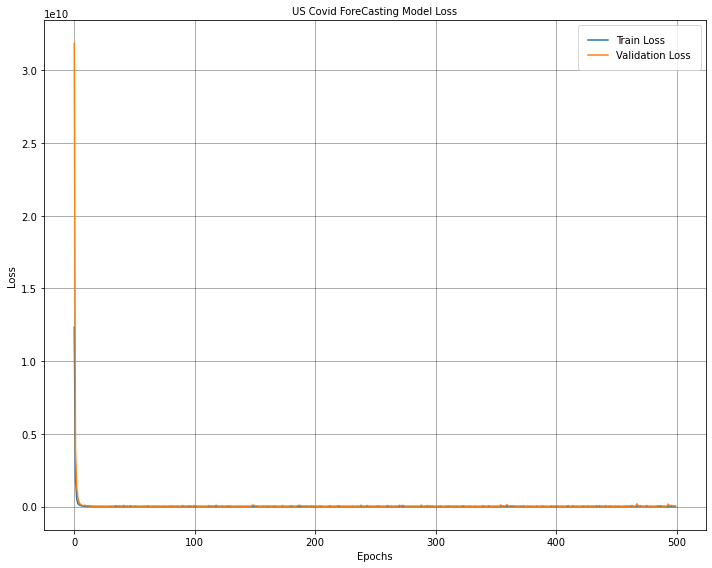

In [70]:
#Plotting the Loss 

fig,ax=plt.subplots(figsize=(10,8))
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs',fontsize=10, color='black',)
plt.ylabel('Loss',fontsize=10, color='black')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True,color='black',alpha=0.4)
plt.title("US Covid ForeCasting Model Loss",fontsize=10, color='black')
plt.legend(loc=1,borderpad=1,fontsize=10)
plt.tight_layout()

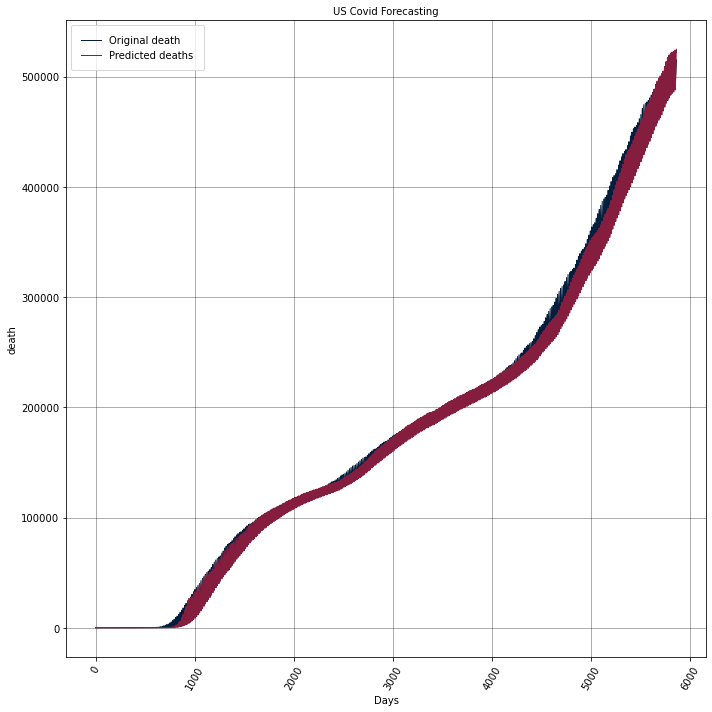

In [71]:
preds=model.predict(X).flatten()

y_plot=y.flatten()
fig,ax=plt.subplots(figsize=(10,10))
plt.plot(y_plot,label='Original death', color='#051e3e',linewidth=1)
plt.plot(preds,label='Predicted deaths', color='#851e3e',linewidth=1)
plt.xlabel('Days',fontsize=10, color='black',)
plt.ylabel('death',fontsize=10, color='black')
plt.xticks(fontsize=10,rotation=60)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("US Covid Forecasting",fontsize=10, color='black')
plt.legend(loc=2,borderpad=1,fontsize=10)
plt.tight_layout()

The MSE from our Linear Regression Model is 570364307.6292675


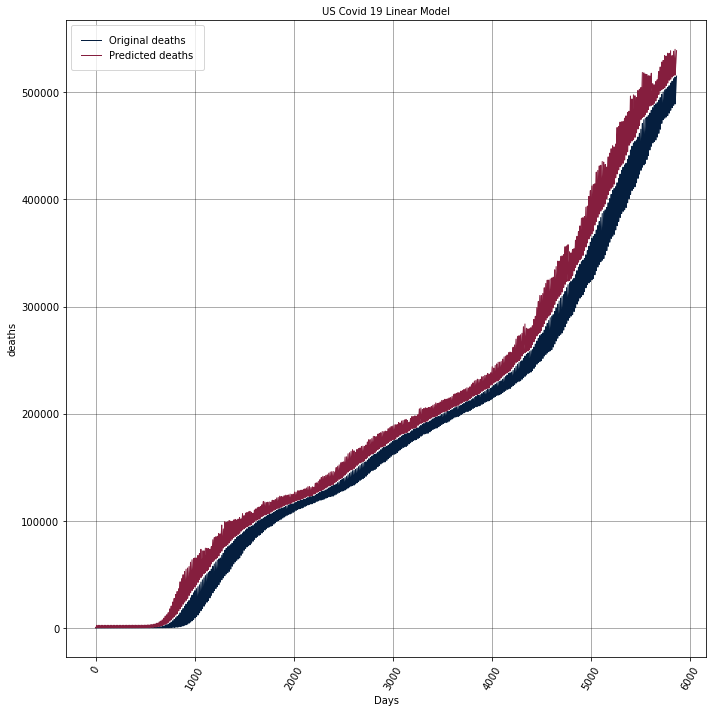

In [72]:
# we Develop Linear Model
lr=LinearRegression()
LR = lr.fit(X,y)
y_LR = LR.predict(y)
mse=((y.flatten()-y_LR.flatten())**2).mean()
print(f'The MSE from our Linear Regression Model is {mse}')
y_plot=y.flatten()

#Plotting the Predictions

fig,ax=plt.subplots(figsize=(10,10))
plt.plot(y_plot,label='Original deaths', color='#051e3e',linewidth=1)
plt.plot(y_LR.flatten(),label='Predicted deaths', color='#851e3e',linewidth=1)



plt.xlabel('Days',fontsize=10, color='black',)
plt.ylabel('deaths',fontsize=10, color='black')
plt.xticks(fontsize=10,rotation=60)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("US Covid 19 Linear Model",fontsize=10, color='black')
plt.legend(loc=2,borderpad=1,fontsize=10)
plt.tight_layout()

Text(0.5, 1.0, 'MSE VS Degree')

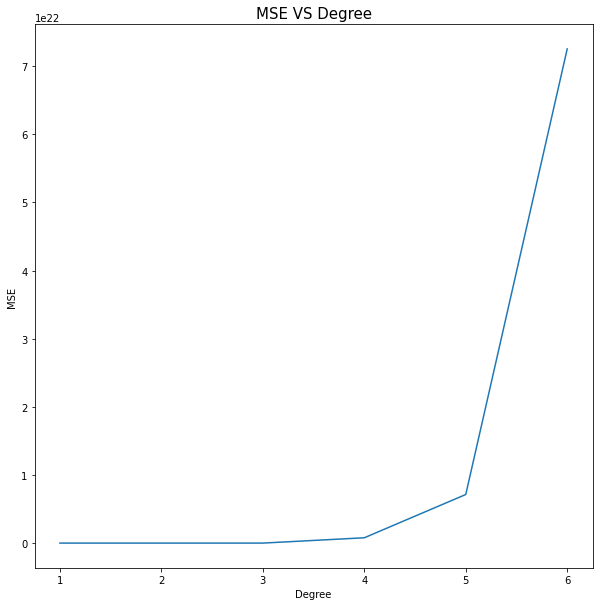

In [73]:
#Building Polynomial Model 
maxdegree=7 # The maximum degree we would like to test
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(X)
    lr=LinearRegression(fit_intercept=False)
    model_log=lr.fit(x_poly_train,y)
    y_train_pred=model_log.predict(x_poly_train)
    mse_train=mean_squared_error(y,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Degree',fontsize=10)
ax.set_ylabel('MSE',fontsize=10)
ax.set_title('MSE VS Degree',fontsize=15)

## considering the error above, our MLP performed the best for Time Series forecasting and hence we will use this model for our predictions for the next 15 days.

In [74]:
## We create Date Labels,for the next 15 days 
date_labels=[]
style='2020-03'
for i in range(13,28):
    date_labels.append(f'{style}-{i}')

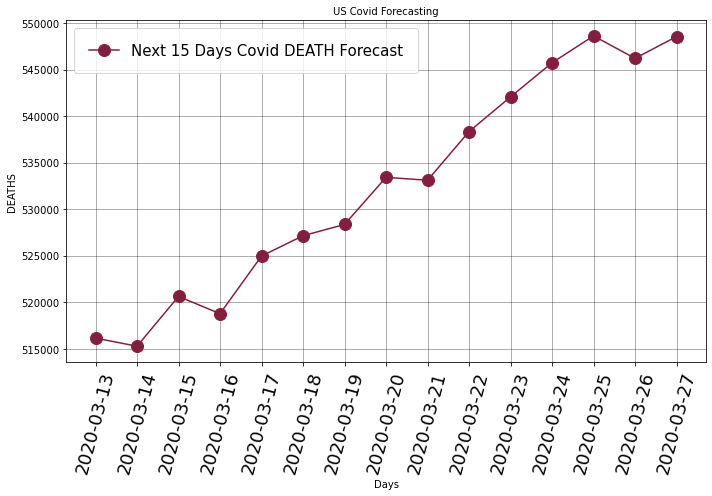

In [75]:
# The predictions for the next 15 days are 
next_15_days=model.predict(Y.reshape(1,15))
fig,ax=plt.subplots(figsize=(10,7))
plt.plot(date_labels,next_15_days.flatten(),label='Next 15 Days Covid DEATH Forecast', color='#851e3e',marker='o',markersize=12)
plt.xlabel('Days',fontsize=10, color='black',)
plt.ylabel('DEATHS',fontsize=10, color='black')
plt.xticks(fontsize=18,rotation=75)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("US Covid Forecasting",fontsize=10, color='black')
plt.legend(loc=2,borderpad=1,fontsize=15)
plt.tight_layout()

## building  machine learning models to predict the number of recovered patients.

In [76]:
y = US_data['recovered'].values
x = US_data[['hospitalized', 'positive',]].values 

In [77]:
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [78]:
Lasso_model = Lasso()

In [79]:
Lasso_model.fit(X_train,  y_train)

Lasso()

In [80]:
y_pred = Lasso_model.predict(X_test)

In [81]:
y_pred

array([38464.28553658, 16521.87070895, 18569.35561827, ...,
       22719.51697333, 51706.66049618, 16533.87228469])

In [82]:
Dframe = pd.DataFrame({'actual' : y_test.flatten(), 'predicted' : y_pred.flatten()})

<AxesSubplot:>

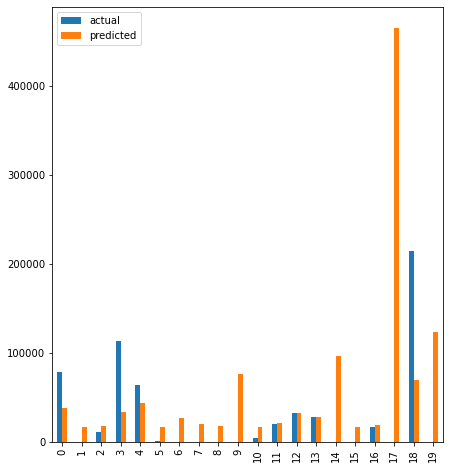

In [83]:
Dframe.head(20).plot(kind ='bar')  ## plotting the first 20 values

In [84]:
print('Mean Squared Error Lasso:', metrics.mean_squared_error(y_test, y_pred))  


Mean Squared Error Lasso: 23938538766.478127


In [85]:
Ridge_model = Ridge()
Ridge_model.fit(X_train,  y_train)

Ridge()

In [86]:
Ridge_predict = Ridge_model.predict(X_test)

<AxesSubplot:>

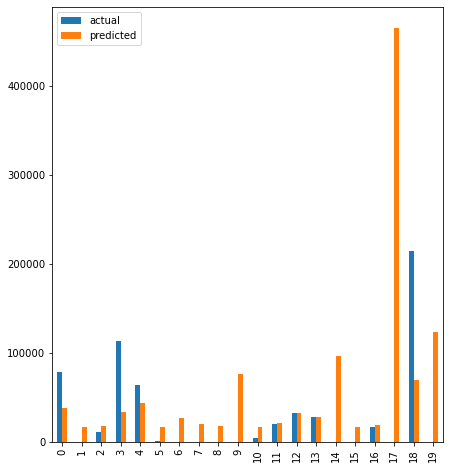

In [87]:
Dframe_ridge = pd.DataFrame({'actual' : y_test.flatten(), 'predicted' : Ridge_predict.flatten()})

Dframe_ridge.head(20).plot(kind ='bar')

In [88]:
print('Mean Squared Error Ridge:', metrics.mean_squared_error(y_test, Ridge_predict )) 

Mean Squared Error Ridge: 23938538767.10324


In [89]:
linear = LinearRegression()

In [90]:
linear.fit(X_train,  y_train)

LinearRegression()

In [91]:
linear_y = linear.predict(X_test)

<AxesSubplot:>

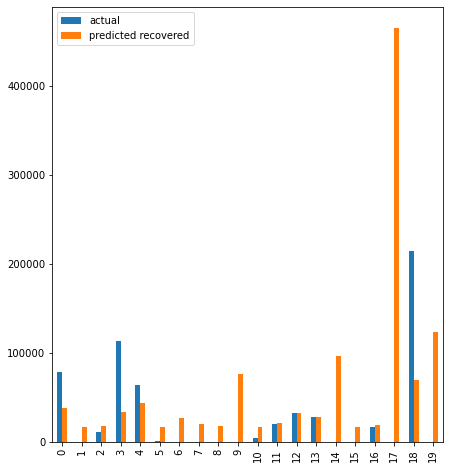

In [92]:
Dframe_linear = pd.DataFrame({'actual' : y_test.flatten(), 'predicted recovered' : linear_y.flatten()})

Dframe_linear.head(20).plot(kind ='bar')

In [93]:
print('Mean Squared Error linear:', metrics.mean_squared_error(y_test, linear_y )) 

Mean Squared Error linear: 23938538767.1033


## predicting hospitalizations

In [94]:
Y = US_data['hospitalized'].values
X = US_data[['negative', 'positive',]].values 

In [95]:
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [96]:
LR_model = LinearRegression()

In [97]:
LR_model.fit(X_train, y_train)

Y_pred = LR_model.predict(X_test)

<AxesSubplot:>

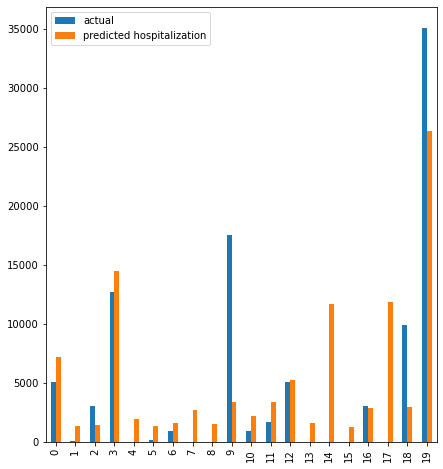

In [98]:
Df_linear = pd.DataFrame({'actual' : y_test.flatten(), 'predicted hospitalization' : Y_pred.flatten()})

Df_linear.head(20).plot(kind ='bar')

In [99]:
print('Mean Squared Error linear:', metrics.mean_squared_error(y_test, Y_pred)) 

Mean Squared Error linear: 54840705.4828751


In [100]:
La_model = Lasso()
La_model.fit(X_train,  y_train)


Lasso()

In [101]:
y_predd = Lasso_model.predict(X_test)

In [102]:
print('Mean Squared Error lasso:', metrics.mean_squared_error(y_test, y_predd))

Mean Squared Error lasso: 3842081046684.0337


In [103]:
Ri_model =  Ridge()
Ri_model.fit(X_train,  y_train)
y_preddd = Ri_model.predict(X_test)

In [104]:
print('Mean Squared Error Ridge:', metrics.mean_squared_error(y_test, y_preddd))

Mean Squared Error Ridge: 54840705.482875206


## summary


Project C1 Report
The project is based on the analysis of COVID 19 status in the US through visualizing data provided through a dataset concerned with all the US states.
Our Goals were basically two, and they were both successfully achieved.
For the first goal:
By preliminary scanning of the data set, it was obvious that lots of data needed to be cleaned.
Then dataset needed to be organized according to the date.
So, dataset was prepared for analysis along 15 months period, starting January 2020 till March 2021.
Lots of Data columns were irrelevant in the dataset, since they involved detailed medical examinations without providing reference neither to age or false positive or false negative data.
Trying to visualize such data in order to be a source of knowledge, required a medical background about the purpose of each test and the impact of the results. However; such type of data was not available. In real life, such data is basically provided by the client and since it is a client free project, we worked on the relevant data according to our knowledge. Otherwise; visualization of such medical examination data would have just been a conversion from data to graph version, with no impact on the expected outcome.
Goal one visualization was done on three main levels:
(1)General representation of different cases of patients (hospitalized and unhospitalized), recovered and deaths along all of the US states.
(2)A correlation between different aspects and visualizing their change along time scale defined
(3)A 7 day analysis of COVID19 in each of the highly infected states independently
Outcome:
It has been clear that the number of deaths was increasing along the year in all states
However; in parallel the number of negative cases was also increasing, which might be attributed to vaccination, although this was not mentioned, but it is globally known.
Also, the number of recovered patients was increasing
As for hospitalized patients, it was clear that the number of patients at high risk (on ventilator) were much less compared to those in ICU and both were far much less compared to the generally hospitalized patients
Brief
COVID 19 status is generally improving in US although infection rate is increasing and death rate is as well increasing, but this is faced by an opposite increased in recovery.

o for the machine learning 

Predicting hospitalizations : All the models used include linear regression, lasso and regression models. 

But we can say that linear model before best because it has a lower mean square error compared to the other..
For predicting number of recovered patients. We also evaluated the models by calculating the MSE, and the lasso model was the lowest MSE

For predicting number of  deaths. We used machine learning models We also evaluated the models by calculating the MSE, and the Multilayer perceptron model,  has the lowest MSE, it out performed other models
But,  overall,  the MSE from all the models are quite large..

This could probably be caused by plenty of null values which we replaced with zeros.